In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2

In [2]:
def func(x):
  return np.sin(2*np.pi*1*x)

In [3]:
def delta(x,n,a):
  if x == n*a:
    return 1
  else:
    return 0

In [4]:
def function_f(x_i,n,a):
  sum = 0
  for j in range(n):
    sum += func(j*a)*delta(x_i,j,a)
  return sum

In [5]:
def function_d(x_i,n,a):
  sum = 0
  for j in range(4):
    sum += 1/4*delta(x_i,j,a)
  return sum

In [6]:
def inverse_Dk(Dk,eps):
  if np.abs(Dk) > eps:
    return 1/Dk
  else:
    return 1/eps

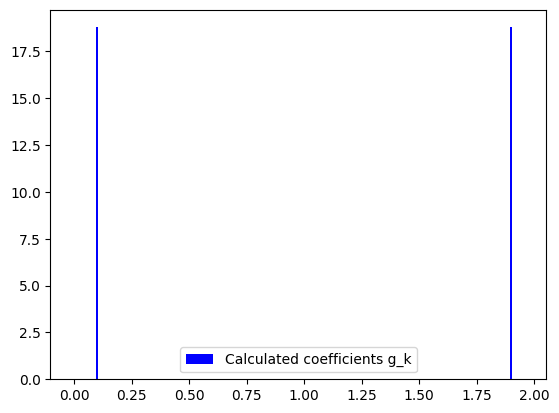

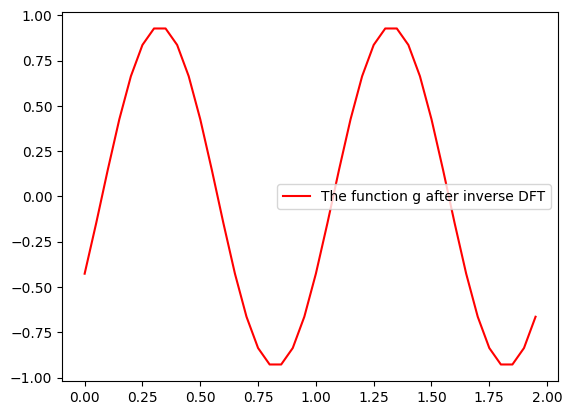

In [10]:
n = 40 # Number of points
a = 1 / 20  # Step size for the discretized range of x
x = np.arange(0, 2, a)  # Generate evenly spaced values between 0 and 2 with step size a

# Initialize the functions f(x) and d(x)
f = []
d = []
for i in x:
    f.append(function_f(i, n, a))
    d.append(function_d(i, n, a))

# Compute the DFT of f(x) and d(x)
f_k = np.fft.fft(f)
d_k = np.fft.fft(d)

# Perform convolution in the frequency domain using the property of DFT
g_k = f_k * d_k

# Compute the inverse DFT to get g(x) in the spatial domain
g = np.fft.ifft(g_k)  # Inverse Fourier Transform of g_k to obtain g(x)
plt.figure()
plt.bar(x, np.abs(g_k), label = "Calculated coefficients g_k", width = 0.01, color = "b")
plt.legend()
plt.show()

# Plot the real part of g(x) after inverse DFT
plt.figure()
plt.plot(x, g.real, label="The function g after inverse DFT", color="r")
plt.legend()
plt.show()

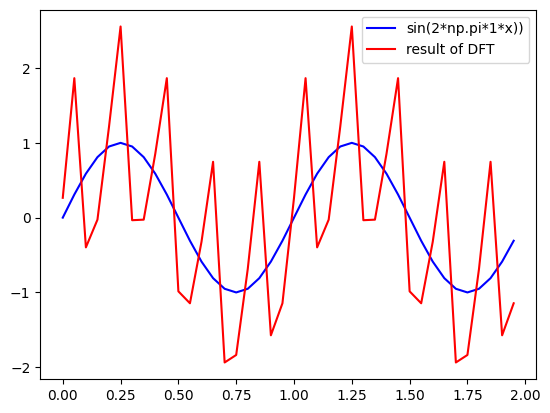

In [11]:
# Compute the DFT of g and d
G_k = np.fft.fft(g)
D_k = np.fft.fft(d)

# Use the convolution property to calculate F_k
F_k = G_k / D_k

# Compute the inverse DFT to get f(x)
f_dft = np.fft.ifft(F_k)

plt.figure()
plt.plot(x,f,label="sin(2*np.pi*1*x))", color="b")
plt.plot(x, f_dft.real, label="result of DFT", color="r")
plt.legend()
plt.show()

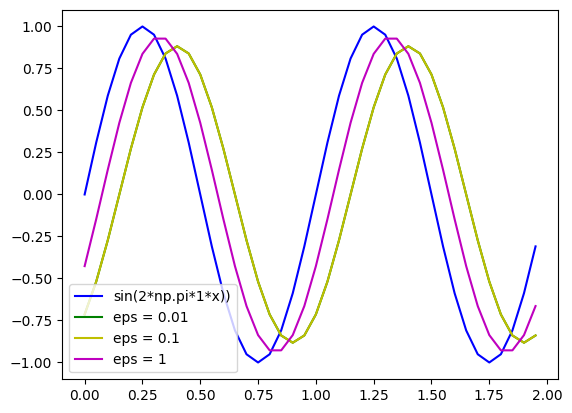

In [12]:
# Compute the DFT of g
G_k = np.fft.fft(g)  # DFT of g(x)

# Initialize a list for D_k (DFT of d)
D_k = []

# Set of different epsilon values to handle small values in D_k
eps = [0.01, 0.1, 1, 2]

# Compute the DFT of d for each epsilon
for i in range(len(eps)):
    D_k.append(np.fft.fft(d))

# Adjust D_k coefficients using the "inverse" function for each epsilon
for i in range(len(eps)):
    for j in range(len(D_k[i])):
        D_k[i][j] = inverse_Dk(D_k[i][j], eps[i])

# Use the convolution property to compute F_k for each epsilon
F_k = []
for i in range(len(eps)):
    F_k.append(G_k / D_k[i])

# Compute the inverse DFT to recover f(x) for each epsilon
f_dft = []
for i in range(len(eps)):
    f_dft.append(np.fft.ifft(F_k[i]))

plt.figure()
plt.plot(x,f,label="sin(2*np.pi*1*x))", color="b")
plt.plot(x, f_dft[0].real, label="eps = 0.01", color="g")
plt.plot(x, f_dft[1].real, label="eps = 0.1", color="y")
plt.plot(x, f_dft[2].real, label="eps = 1", color="m")
plt.legend()
plt.show()